# Import libraries and make the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # sinusoidal
s2 = np.sign(np.sin(3 * time))  # square signal
s3 = signal.sawtooth(2 * np.pi * time)  # saw tooth signal


# Define G and its Derivative

In [2]:
def g(x):
    return np.tanh(x)
def g_prime(x):
    return 1-g(x)*g(x)

# Preproceesing Data

In [3]:
def center(X):
    X = np.array(X)
    
    mean = X.mean(axis=1, keepdims=True)
    
    return X- mean

In [4]:
def whitening(X):
    cov = np.cov(X)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten

In [5]:
def calculate_new_w(w, X):
    w_new = (X * g(np.dot(w.T, X))).mean(axis=1) - g_prime(np.dot(w.T, X)).mean() * w
    w_new /= np.sqrt((w_new ** 2).sum())
    return w_new

# ICa Algoryhm

In [6]:
def ica(X, iterations, tolerance=1e-5):
    X = center(X)
    
    X = whitening(X)
        
    components_nr = X.shape[0]
    W = np.zeros((components_nr, components_nr), dtype=X.dtype)
    for i in range(components_nr):
    
        
        w = np.random.rand(components_nr)
        
        for j in range(iterations):
            
            w_new = calculate_new_w(w, X)
            
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            
            if distance < tolerance:
                break
                
        W[i, :] = w
        
    S = np.dot(W, X)
    
    return S

# Input output

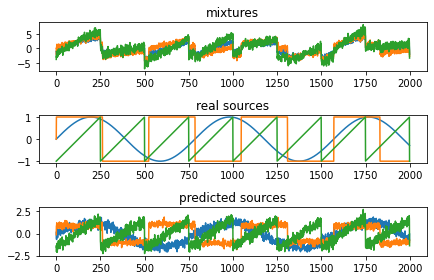

In [7]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(S, A.T)
X = X.T
S_ = ica(X, iterations=1000)
original_sources=[s1, s2, s3]


#Plot
fig = plt.figure()
plt.subplot(3, 1, 1)
for x in X:
    plt.plot(x)
plt.title("mixtures")
plt.subplot(3, 1, 2)
for s in original_sources:
    plt.plot(s)
plt.title("real sources")
plt.subplot(3,1,3)
for s in S_:
    plt.plot(s)
plt.title("predicted sources")
fig.tight_layout()
plt.show()